In [2]:
import math
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import os 

# import subset of images from the training dataset
path = './Dataset/Training/'
expressions = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
samp_per_exp = 3500 # number of samples per expression - increase later 
i = 0

raw_train = []

# open the first samp_size images in path directory
for exp in expressions:
    for file in os.listdir(path + exp + '/')[:samp_per_exp]:
        if file.endswith('.jpg'):
            img = plt.imread(path + exp + '/' + file)
            # convert to numpy vector
            img = img.flatten()
            raw_train.append(img)
            # print(img.shape)


In [3]:
# vectorize training images
train = np.array(raw_train)
print(train)
print(train.shape)

# determine mean intensity of each pixel
mean = np.mean(train, axis=0)
print(mean)

# mean center pixel intensities
train = train - mean
print(train)
print(train.shape)



[[152 149 147 ... 193 181 183]
 [117 116 114 ...  45  47  50]
 [159 159 145 ... 140 148 126]
 ...
 [142 147 156 ... 221 219 218]
 [121 117 125 ... 182 184 182]
 [107 107 109 ...  79  86 107]]
(20671, 2304)
[122.39862609 119.12877945 116.05490784 ... 113.46770838 114.16365923
 114.93904504]
[[ 29.60137391  29.87122055  30.94509216 ...  79.53229162  66.83634077
   68.06095496]
 [ -5.39862609  -3.12877945  -2.05490784 ... -68.46770838 -67.16365923
  -64.93904504]
 [ 36.60137391  39.87122055  28.94509216 ...  26.53229162  33.83634077
   11.06095496]
 ...
 [ 19.60137391  27.87122055  39.94509216 ... 107.53229162 104.83634077
  103.06095496]
 [ -1.39862609  -2.12877945   8.94509216 ...  68.53229162  69.83634077
   67.06095496]
 [-15.39862609 -12.12877945  -7.05490784 ... -34.46770838 -28.16365923
   -7.93904504]]
(20671, 2304)


In [4]:
# compute covariance matrix
cov = np.cov(train, rowvar=False)
print(cov)
print(cov.shape)

[[6905.01670639 6483.58098004 5860.70979968 ... 1363.8114699
  1453.95473865 1520.46479288]
 [6483.58098004 6659.44059938 6235.25524119 ... 1297.18804839
  1380.70906333 1434.45400397]
 [5860.70979968 6235.25524119 6457.54807352 ... 1258.25167639
  1333.32212128 1373.43135868]
 ...
 [1363.8114699  1297.18804839 1258.25167639 ... 6015.00542793
  5771.57347569 5419.62130201]
 [1453.95473865 1380.70906333 1333.32212128 ... 5771.57347569
  6123.82183555 5897.52898939]
 [1520.46479288 1434.45400397 1373.43135868 ... 5419.62130201
  5897.52898939 6209.41786148]]
(2304, 2304)


In [5]:
# eigenvalue decomposition to get eigenvectors and eigenvalues

e_vals, e_vecs = np.linalg.eig(cov)

e_val_vec = []
for i in range(len(e_vals)):
    e_val_vec.append([e_vals[i].real, e_vecs[i]])

# sort eigenvalues by magnitude

e_val_vec.sort(key=lambda x: abs(x[0]), reverse=True)

print(len(e_val_vec))

print([val[0] for val in e_val_vec[:30]])

# greatest_imag_val = 0
# greatest_imag_vec = 0
# greatest_real_val = 0
# greatest_real_vec = 0

# for i in range(len(e_vals)):
#     if abs(e_vals[i].imag) > greatest_imag_val:
#         greatest_imag_val = abs(e_vals[i].imag)
    
#     for x in e_vecs[i].flatten():
#         if abs(x.imag) > greatest_imag_vec:
#             greatest_imag_vec = abs(x.imag)

#     if abs(e_vals[i].real) > greatest_real_val:
#         greatest_real_val = abs(e_vals[i].real)

#     for x in e_vecs[i].flatten():
#         if abs(x.real) > greatest_real_vec:
#             greatest_real_vec = abs(x.real)

# print(greatest_imag_val)
# print(greatest_imag_vec)
# print(greatest_real_val)
# print(greatest_real_vec)




# for i in range(len(eig_vals)):
#     print('Eigenvalue: ', eig_vals[i], ' Eigenvector: ', eig_vecs[i])


2304
[2709920.415319225, 900105.2989966644, 866720.3273862952, 509162.252184889, 279907.32951668766, 238049.58951964878, 199921.92787363526, 181773.93411766895, 165935.17467369145, 140039.70236974163, 107752.61712744384, 100760.28990235187, 94817.95489808619, 94208.07780071365, 86700.3523881329, 75474.75934547817, 73437.15202905443, 61273.321685356816, 50912.92138091726, 50027.28457929089, 49612.78379200017, 46583.159684297236, 45586.12444601707, 42393.97728010608, 40396.59695801149, 38996.70985738637, 38299.55013674818, 35228.811074540994, 32438.72284754863, 31649.141532717742]


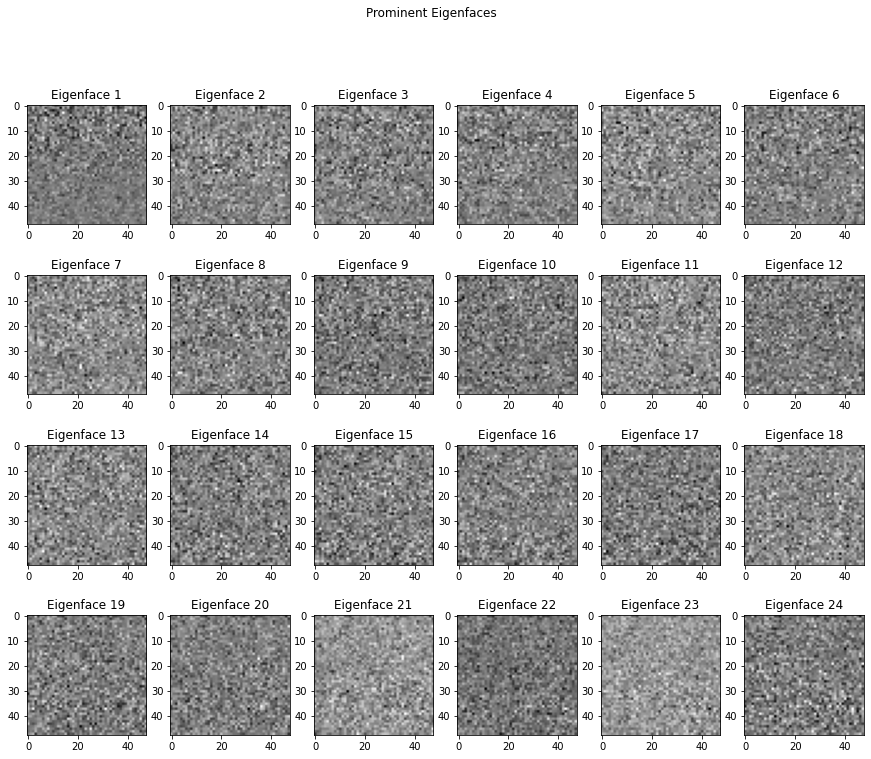

In [6]:
# use the n eigenvectors with greatest eigenvalues to form new basis
n = 1600
sig_e_vecs = np.array([x[1] for x in e_val_vec[:n]])

def plot_eigenfaces():
    fig = plt.figure(figsize=(15, 12))
    for i in range(24):
        ax = fig.add_subplot(4, 6, i + 1, )
        ax.imshow(sig_e_vecs[i].reshape(48, 48), cmap='gray')
        ax.set_title('Eigenface ' + str(i + 1))
    # fig.tight_layout()
    fig.suptitle('Prominent Eigenfaces')
    
plot_eigenfaces()



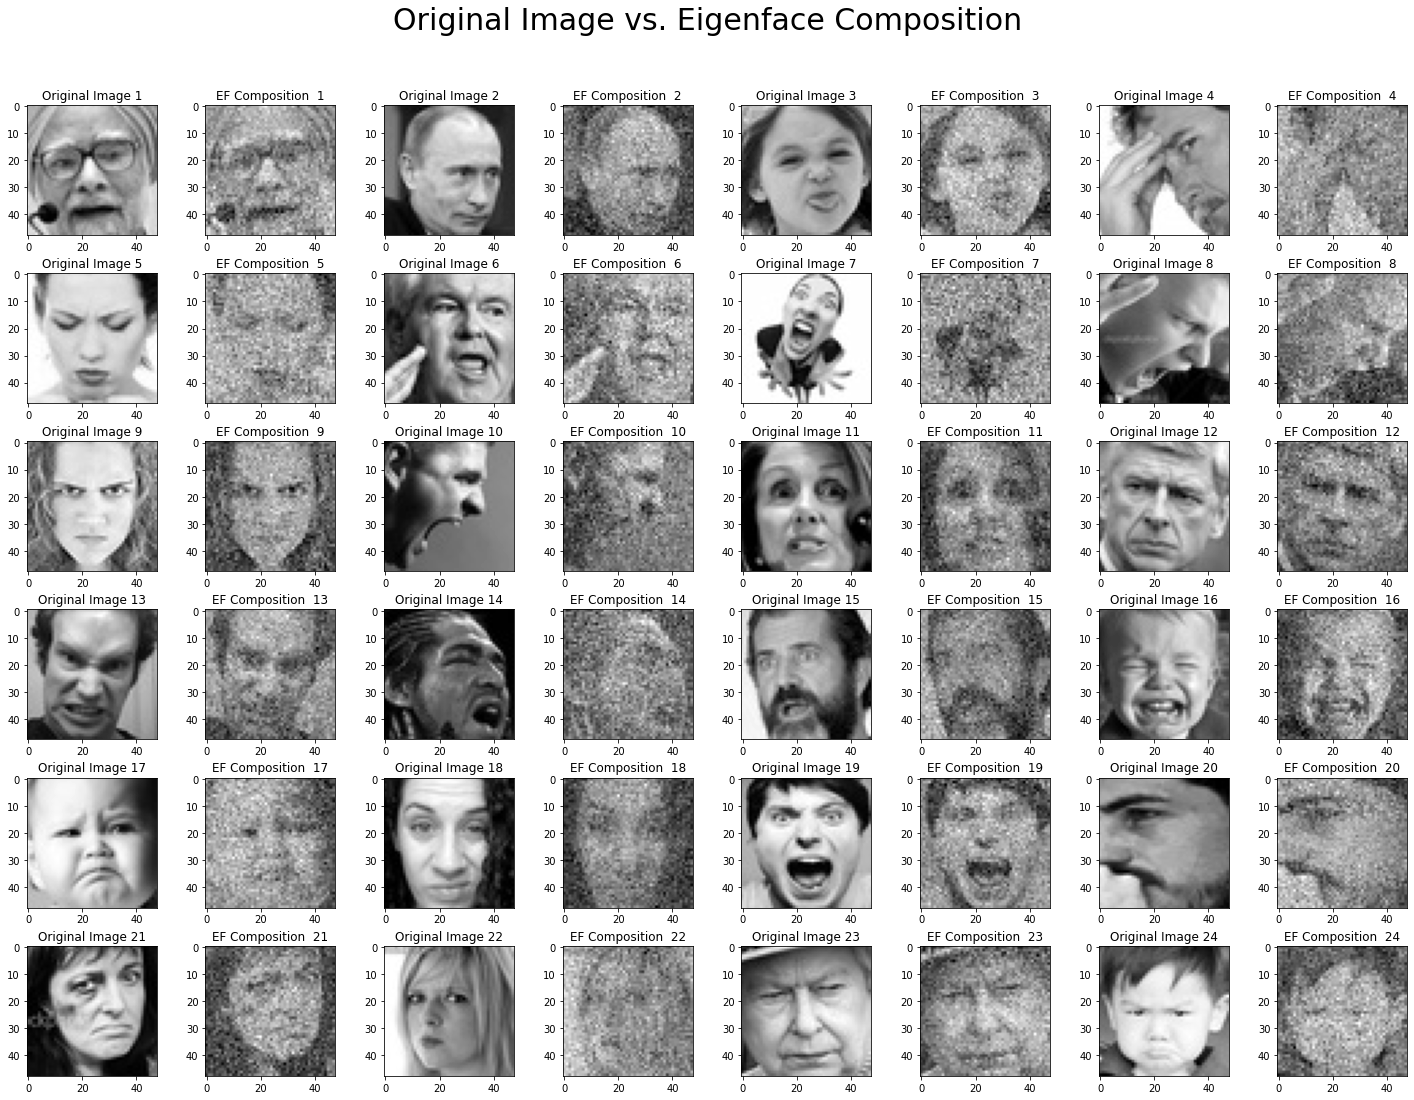

In [7]:

# project training images onto new basis
proj_train = np.matmul(train, sig_e_vecs.T)

# convert training images to new basis
comp_train = np.matmul(proj_train, sig_e_vecs)

# add mean back to training images
comp_train = comp_train + mean

def compare_imgs(comp, raw, cols, rows, title):
    fig = plt.figure(figsize=(int(cols * 5), int((rows * 2.5) + 1)))
    # fig = plt.figure()
    
    for i in range(cols * rows):
        ax1 = fig.add_subplot(rows, cols * 2, (2*i) + 1)
        ax1.imshow(raw[i].reshape(48, 48), cmap='gray')
        ax1.set_title('Original Image ' + str(i + 1))
        ax2 = fig.add_subplot(rows, cols * 2, (2*i) + 2)
        ax2.imshow(comp[i].reshape(48, 48), cmap='gray')
        ax2.set_title('EF Composition  ' + str(i + 1))
    
    fig.suptitle('Original Image vs. Eigenface Composition', fontsize=30)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    

compare_imgs(comp_train, raw_train)

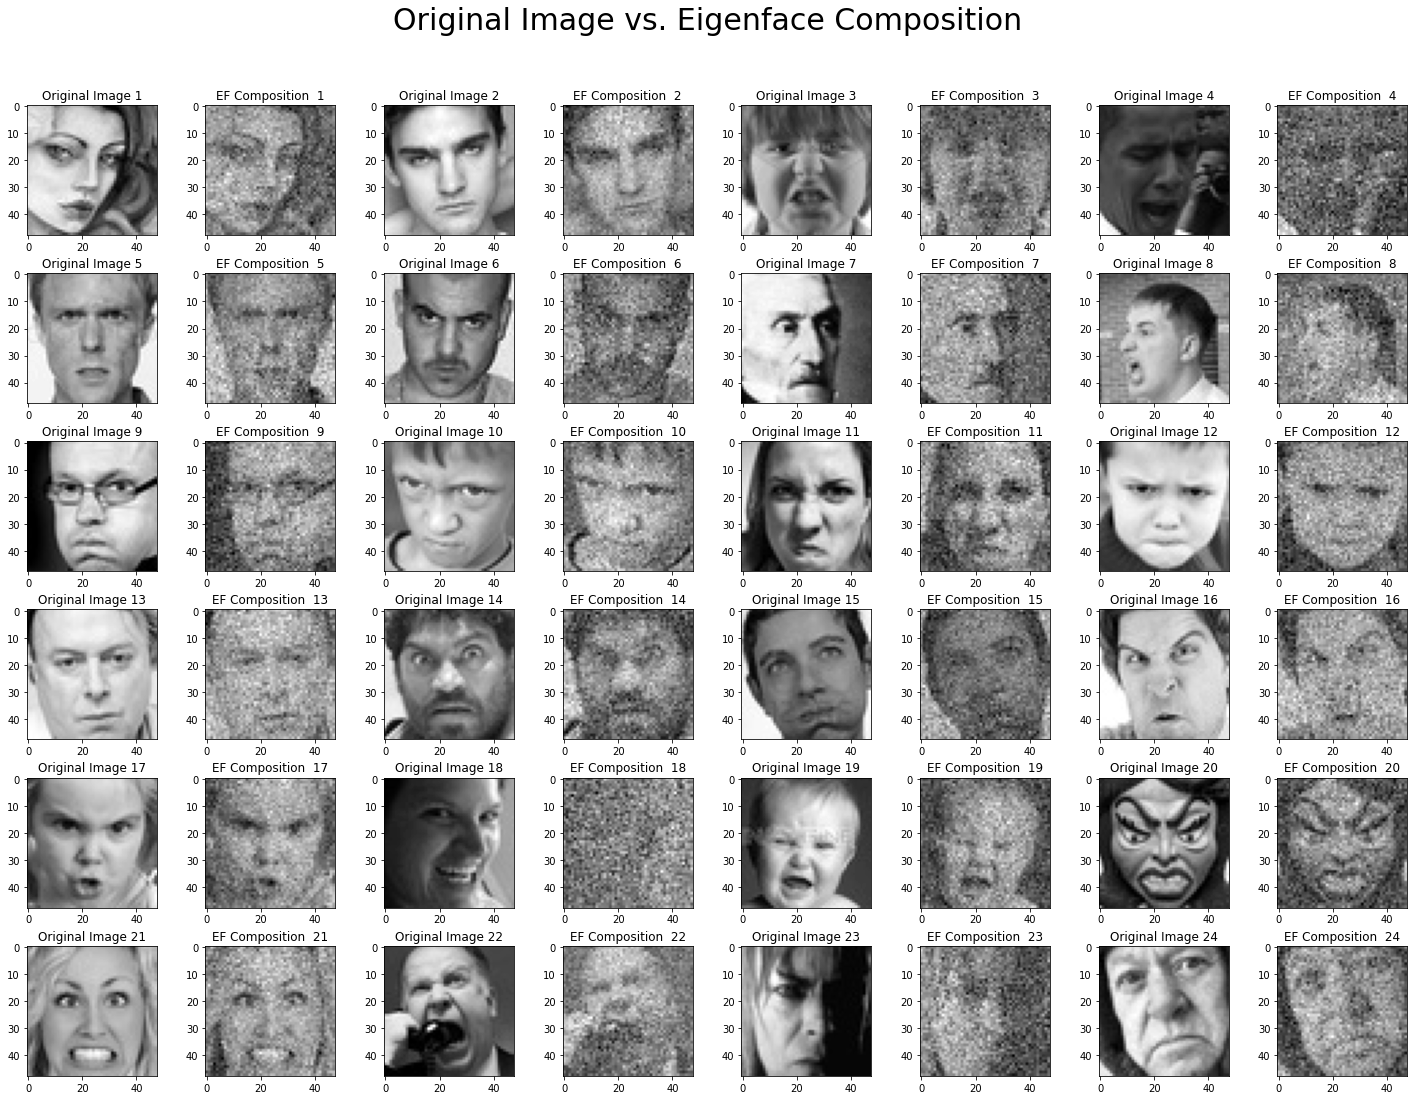

In [8]:
### TESTING ON TESTING DATASET ###

# import testing images
test_imgs = []

path = './Dataset/Testing/'
for exp in expressions:
    for file in os.listdir(path + exp + '/'):
        if file.endswith('.jpg'):
            img = plt.imread(path + exp + '/' + file)
            img = img.flatten()
            test_imgs.append(img)

def get_eigenface_rep(vec):
    vec = vec - mean
    proj = np.matmul(vec, sig_e_vecs.T)
    return proj

def convert_to_original(vec):
    proj = np.matmul(vec, sig_e_vecs)
    proj = proj + mean
    return proj

ef_test = [get_eigenface_rep(vec) for vec in test_imgs]
comp_test = [convert_to_original(vec) for vec in ef_test]

compare_imgs(comp_test, test_imgs)